# KHÁM PHÁ DỮ LIỆU

Dữ liệu chứa trong file `tips.csv` chứa thông tin tiền tip của khách hàng tại một nhà hàng. Dữ liệu có các thông tin sau:

- `total_bill`: tổng hoá đơn (USD)
- `tip`: tiền tip/ tiền boa (USD)
- `sex`: giới tính người thanh toán hóa đơn
- `smoker`: có hút thuốc hay không
- `day`: ngày trong tuần
- `time`: thời gian dùng bữa(buổi sáng, buổi trưa, buổi tối)
- `size`: số lượng người tham gia

Bạn hãy thực hiện thống kê mô tả để tìm hiểu về hành vi tip của khách hàng tại nhà hàng

## HIỂU DỮ LIỆU

1. Đọc dữ liệu


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('tips.csv')
df.head(10)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
5,5,25.29,4.71,Male,No,Sun,Dinner,4
6,6,8.77,2.00,Male,No,Sun,Dinner,2
7,7,26.88,3.12,Male,No,Sun,Dinner,4
8,8,15.04,1.96,Male,No,Sun,Dinner,2
9,9,14.78,3.23,Male,No,Sun,Dinner,2


2. Xoá cột `Unnamed: 0`


In [4]:
df = df.drop(columns=['Unnamed: 0'])
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


3. Cho biết dữ liệu có bao nhiêu dòng, bao nhiêu thuộc tính.


In [6]:
num_row, num_col = df.shape

print(f'Dữ liệu có {num_row} dòng và {num_col} cột')

Dữ liệu có 244 dòng và 7 cột


4. Trong các thuộc tính, thuộc tính nào là thuộc tính phân loại, thuộc tính nào là thuộc tính định lượng

In [7]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

5. Có bao nhiêu nam, bao nhiêu nữ. Tỷ lệ bao nhiêu?


In [10]:
count_sex = df['sex'].value_counts()
print(f'Có {count_sex['Male']} nam và {count_sex['Female']} nữ')

Có 157 nam và 87 nữ


6. Có bao nhiêu người hút thuốc. Tỷ lệ bao nhiêu?


In [19]:
count_smorker = df['smoker'].value_counts()['Yes']
rat_smorker = df['smoker'].value_counts(normalize=True)['Yes']
print(f'Có {count_smorker} người hút thuốc với tỉ lệ {(rat_smorker*100):.2f}%')

Có 93 người hút thuốc với tỉ lệ 38.11%


7. Ngày nào trong tuần khách hàng hay đến dùng bữa nhất. Tỷ lệ bao nhiêu?


In [25]:
day_most = df['day'].value_counts().idxmax()
rat_day_most = df['day'].value_counts(normalize=True)[day_most]
print(f'Ngày nhà hàng phục vụ nhiều nhất là {day_most} với tỉ lệ {rat_day_most*100:.2f}%')

Ngày nhà hàng phục vụ nhiều nhất là Sat với tỉ lệ 35.66%


8. Nhà hàng phục vụ bữa ăn nào nhiều nhất (Breakfast, Lunch, Dinner)?


In [26]:
time_most = df['day'].value_counts().idxmax()
count_meal_time_most = df['day'].value_counts()[time_most]
print(f'Bữa ăn nhà hàng phục vụ nhiều nhất là {time_most} với {count_meal_time_most} bữa')

Bữa ăn nhà hàng phục vụ nhiều nhất là Sat với 87 bữa


9. Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là bao nhiêu người?


10. Trung bình trong một bữa ăn nhà hàng phục vụ mấy khách?

In [28]:
mean_customer_in_meal = df['size'].mean()
mean_customer_in_meal

2.569672131147541

## YẾU TỐ ẢNH HƯỞNG ĐẾN TIỀN TIP

Trong phần này, chúng ta thử tìm hiểu về tiền tip tại nhà hàng và các yếu tố có thể ảnh hưởng đến nó

1. Tỷ lệ nhận được tiền tip của nhà hàng là bao nhiêu?


2. Tỷ lệ tiền tip trên tổng hóa đơn là bao nhiêu?


3. Giữa nam và nữ ai tip nhiều tiền hơn, ai tip thường xuyên hơn?


4. Giữa người hút thuốc và người không hút thuốc ai tip nhiều tiền hơn, ai tip thường xuyên hơn?


5. Thống kê tổng số tiền tip nhận được theo ngày.

# TRỰC QUAN DỮ LIỆU

Để dễ hình dung, bạn hãy trực quan với một số câu hỏi sau đây:

1. Vẽ đồ thị thể hiện tổng tiền tip theo ngày


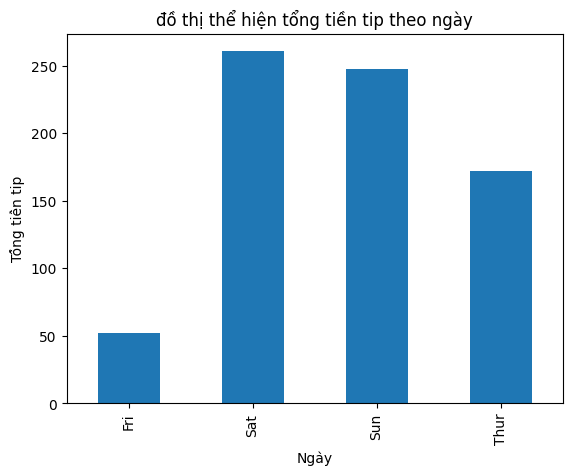

In [32]:
total_tip_in_day = df.groupby(['day'])['tip'].sum()
total_tip_in_day.plot(kind='bar')
plt.title('đồ thị thể hiện tổng tiền tip theo ngày')
plt.xlabel('Ngày')
plt.ylabel('Tổng tiền tip')
plt.show()

2. Vẽ đồ thị thể hiện tổng tiền tip theo bữa ăn (time)


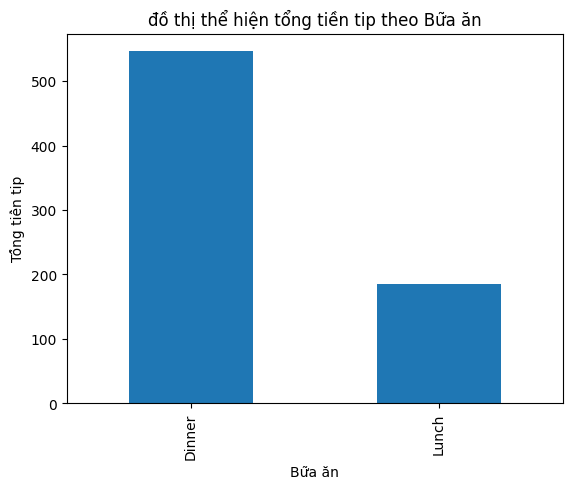

In [34]:
total_tip_in_time = df.groupby(['time'])['tip'].sum()
total_tip_in_time.plot(kind='bar')
plt.title('đồ thị thể hiện tổng tiền tip theo Bữa ăn')
plt.xlabel('Bữa ăn')
plt.ylabel('Tổng tiền tip')
plt.show()

3. Vẽ đồ thị histogram của tổng hoá đơn


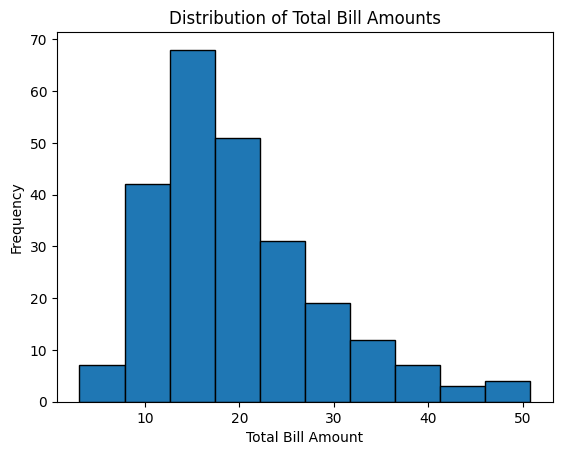

In [36]:
plt.hist(df['total_bill'], bins=10, edgecolor = 'black')
plt.title('Distribution of Total Bill Amounts')
plt.xlabel('Total Bill Amount')
plt.ylabel('Frequency')
plt.show()

4. Vẽ đồ thị boxplot của tổng hoá đơn


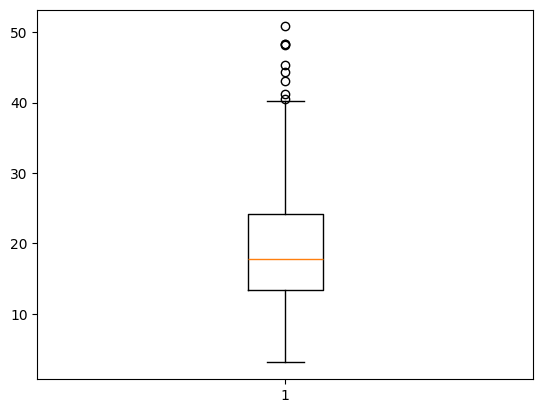

In [37]:
plt.boxplot(df['total_bill'])

plt.show()

5. Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip.


6. So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần.

## Với Matplotlib

Bạn hãy trực quan với thư viện matplotlib

## Với Seaborn

Bạn hãy tìm hiểu và trực quan với thư viện seaborn